## Ban 5753 Exercise 12
### Jarrett Hollie

In [126]:
import pandas as pd
import numpy as np
import os

from varclushi import VarClusHi


from sklearn.decomposition import PCA as pca

from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn import linear_model

import statsmodels.api as sm

In [127]:
pd.options.display.float_format='{:,.2f}'.format

In [128]:
#Load Data

data=pd.read_excel('C:/Users/jarrett.hollie/Desktop/BAN 5733/ENROLLMENT_DATA.xlsx')


In [129]:
data.head()

,Target_Enroll,avg_income,CAMPUS_VISIT,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,ETHNICITY,hscrat,...,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
0,0,NaN,0,EML,1,Sep,2012,NaN,NaN,0.04,...,NaN,N,1,0,2580,0.50,2322,0.50,0.90,1.11
1,0,NaN,0,SAT,12,Feb,2014,NaN,N,0.04,...,NaN,N,1,0,2580,0.50,2322,0.50,0.90,1.11
2,0,NaN,0,C01,16,Jan,2015,NaN,C,0.04,...,NaN,N,1,0,2580,0.50,2322,0.50,0.90,1.11
3,0,NaN,0,EML,11,Mar,2015,NaN,NaN,0.04,...,NaN,N,1,0,2580,0.50,2322,0.50,0.90,1.11
4,0,NaN,0,TFL,28,Mar,2015,NaN,B,0.04,...,NaN,N,2,0,2580,0.50,2322,0.50,0.90,1.11


In [130]:
data.shape

(4644, 35)

In [131]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Target_Enroll,"4,644.00",0.50,0.50,0.00,0.00,0.50,1.00,1.00
avg_income,"3,961.00","53,458.72","23,003.21","9,783.00","35,544.00","48,589.00","68,458.00","200,001.00"
CAMPUS_VISIT,"4,644.00",0.15,0.37,0.00,0.00,0.00,0.00,2.00
Contact_Date,"4,644.00",15.74,8.81,1.00,7.00,16.00,23.00,31.00
Contact_Year,"4,644.00","2,014.61",0.72,"2,010.00","2,014.00","2,015.00","2,015.00","2,016.00"
distance,"4,042.00",316.31,368.13,0.79,102.11,159.89,371.08,"3,820.89"
hscrat,"4,644.00",0.09,0.15,0.00,0.02,0.05,0.10,1.00
ID,"4,644.00","44,503.24","22,305.09",32.00,"28,013.75","45,662.00","62,609.25","82,327.00"
init_span,"4,644.00",19.18,9.26,-216.00,12.00,18.00,23.00,72.00
int1rat,"4,644.00",0.05,0.04,0.00,0.02,0.05,0.05,1.00


In [132]:
data['Target_Enroll'].value_counts()

0    2322
1    2322
Name: Target_Enroll, dtype: int64

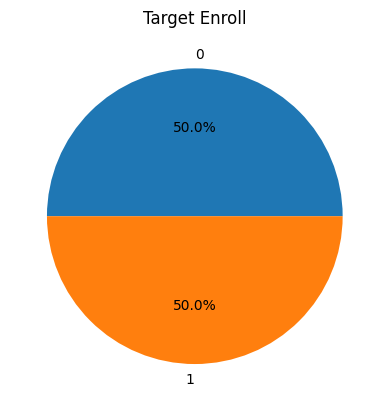

In [133]:
data.groupby('Target_Enroll').size().plot(kind='pie', title="Target Enroll",autopct='%1.1f%%')
plt.show()

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Target_Enroll       4644 non-null   int64  
 1   avg_income          3961 non-null   float64
 2   CAMPUS_VISIT        4644 non-null   int64  
 3   CONTACT_CODE1       4639 non-null   object 
 4   Contact_Date        4644 non-null   int64  
 5   Contact_Month       4644 non-null   object 
 6   Contact_Year        4644 non-null   int64  
 7   distance            4042 non-null   float64
 8   ETHNICITY           4107 non-null   object 
 9   hscrat              4644 non-null   float64
 10  ID                  4644 non-null   int64  
 11  init_span           4644 non-null   int64  
 12  Instate             4644 non-null   object 
 13  int1rat             4644 non-null   float64
 14  int2rat             4644 non-null   float64
 15  interest            4644 non-null   int64  
 16  IRSCHO

In [135]:
#drop columns that values are the same across all records
data1=data.drop(columns=['Total','AllocProportion','SampleSize','ActualProportion','SelectionProb','SamplingWeight','IRSCHOOL' ])

In [136]:
#One Hot Encode
data1=pd.get_dummies(data1,['CONTACT_CODE1','Contact_Month','Instate', 'LEVEL_YEAR','ETHNICITY','TERRITORY'])

In [137]:
#impute missing values 
columns=data1.columns.values.tolist()
print(columns)

for z in columns:
    data1[z] = data1[z].fillna(data1[z].median())

['Target_Enroll', 'avg_income', 'CAMPUS_VISIT', 'Contact_Date', 'Contact_Year', 'distance', 'hscrat', 'ID', 'init_span', 'int1rat', 'int2rat', 'interest', 'mailq', 'premiere', 'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq', 'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'CONTACT_CODE1_A03', 'CONTACT_CODE1_A04', 'CONTACT_CODE1_ACT', 'CONTACT_CODE1_AGN', 'CONTACT_CODE1_APP', 'CONTACT_CODE1_ATH', 'CONTACT_CODE1_BHC', 'CONTACT_CODE1_BST', 'CONTACT_CODE1_C01', 'CONTACT_CODE1_C02', 'CONTACT_CODE1_C03', 'CONTACT_CODE1_C04', 'CONTACT_CODE1_CAV', 'CONTACT_CODE1_CIP', 'CONTACT_CODE1_CLD', 'CONTACT_CODE1_CLT', 'CONTACT_CODE1_CMP', 'CONTACT_CODE1_COC', 'CONTACT_CODE1_CRS', 'CONTACT_CODE1_CTI', 'CONTACT_CODE1_CTL', 'CONTACT_CODE1_CWS', 'CONTACT_CODE1_CWY', 'CONTACT_CODE1_EML', 'CONTACT_CODE1_FPA', 'CONTACT_CODE1_FPR', 'CONTACT_CODE1_HCD', 'CONTACT_CODE1_HST', 'CONTACT_CODE1_HSV', 'CONTACT_CODE1_JRS', 'CONTACT_CODE1_LDZ', 'CONTACT_CODE1_LEG', 'CONTACT_CODE1_LMA', 'CO

In [138]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Columns: 142 entries, Target_Enroll to TERRITORY_N
dtypes: float64(8), int64(14), uint8(120)
memory usage: 1.3 MB


In [139]:
X=data1.drop(columns='Target_Enroll')
Y=data1['Target_Enroll']

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Columns: 141 entries, avg_income to TERRITORY_N
dtypes: float64(8), int64(13), uint8(120)
memory usage: 1.3 MB


In [141]:
#build logistic model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)

c:\Users\jarrett.hollie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
#Report Model 
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X)
matrix = confusion_matrix(Y, y_pred)
report = classification_report(Y, y_pred)
print('Classfication Report')
print(report)
print('Confusion Matrix')
print(matrix)

Classfication Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2322
           1       0.87      0.85      0.86      2322

    accuracy                           0.86      4644
   macro avg       0.86      0.86      0.86      4644
weighted avg       0.86      0.86      0.86      4644

Confusion Matrix
[[2018  304]
 [ 348 1974]]


In [143]:
#Prepare for using only numeric values
#remove string varaibles 
data=data.drop(columns=['CONTACT_CODE1','Contact_Month','Instate', 'LEVEL_YEAR','ETHNICITY','IRSCHOOL','TERRITORY' ])
#drop columns that values are the same across all records
data=data.drop(columns=['Total','AllocProportion','SampleSize','ActualProportion','SelectionProb','SamplingWeight' ])

In [144]:
#impute missing values 
columns=data.columns.values.tolist()
print(columns)

for z in columns:
    data[z] = data[z].fillna(data[z].median())

['Target_Enroll', 'avg_income', 'CAMPUS_VISIT', 'Contact_Date', 'Contact_Year', 'distance', 'hscrat', 'ID', 'init_span', 'int1rat', 'int2rat', 'interest', 'mailq', 'premiere', 'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq', 'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS']


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Target_Enroll       4644 non-null   int64  
 1   avg_income          4644 non-null   float64
 2   CAMPUS_VISIT        4644 non-null   int64  
 3   Contact_Date        4644 non-null   int64  
 4   Contact_Year        4644 non-null   int64  
 5   distance            4644 non-null   float64
 6   hscrat              4644 non-null   float64
 7   ID                  4644 non-null   int64  
 8   init_span           4644 non-null   int64  
 9   int1rat             4644 non-null   float64
 10  int2rat             4644 non-null   float64
 11  interest            4644 non-null   int64  
 12  mailq               4644 non-null   int64  
 13  premiere            4644 non-null   int64  
 14  REFERRAL_CNTCTS     4644 non-null   int64  
 15  satscore            4644 non-null   float64
 16  SELF_I

In [146]:
X=data.drop(columns='Target_Enroll')
Y=data['Target_Enroll']

In [147]:
#PCA
reduc_data_pca=X

min_max_scaler=preprocessing.MinMaxScaler()

reduc_data_pca=min_max_scaler.fit_transform(reduc_data_pca)

pca_result=pca(n_components=8).fit(reduc_data_pca)

#obtain the eigenvalues
pca_result.explained_variance_

array([0.23465429, 0.21374167, 0.15016343, 0.08654389, 0.07277053,
       0.04265044, 0.0290121 , 0.02015422])

In [148]:
#components from PCA
pca_result.components_.T*np.sqrt(pca_result.explained_variance_)

array([[ 6.65499217e-04,  1.39588158e-02, -9.64038372e-03,
         2.45835887e-04,  1.13909414e-02,  2.37744158e-02,
         1.16405326e-03,  1.05419380e-02],
       [-8.64587145e-03,  4.36091450e-02,  3.34771774e-02,
         6.03293550e-03,  2.32464744e-02,  1.54812222e-01,
         3.55566283e-02, -5.16475818e-02],
       [ 1.15569043e-02,  7.74676840e-03, -1.40640238e-02,
         2.90817039e-01,  3.52889201e-02, -8.82340310e-03,
         8.92225299e-05,  6.44749621e-04],
       [ 9.79570398e-03, -2.35410423e-02, -2.15733094e-02,
        -6.48353636e-03, -9.19897252e-03,  1.33560658e-02,
        -3.41863856e-03,  4.12649098e-02],
       [-4.80813410e-03, -1.78151948e-02,  1.24178172e-03,
        -1.14344166e-03,  4.07926872e-02,  2.19093611e-03,
         6.33047813e-04,  1.80637948e-02],
       [-1.70650678e-03,  1.11283058e-02, -1.46751785e-02,
        -3.44363398e-03,  3.69049800e-02,  5.07989882e-02,
         2.79351031e-03,  1.18890411e-01],
       [ 1.51329746e-02,  7.520927

([<matplotlib.axis.XTick at 0x200b566d030>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

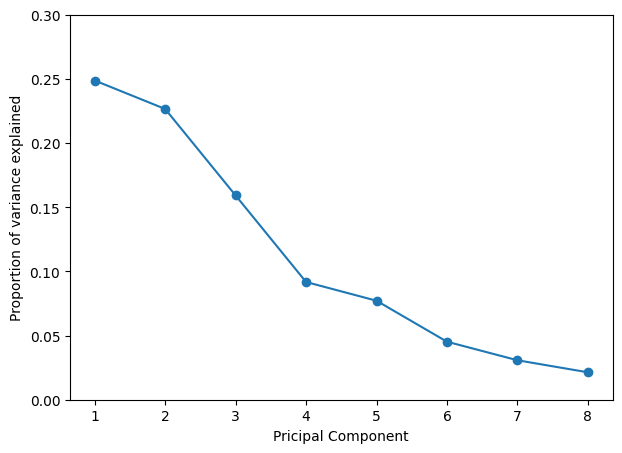

In [149]:
#Create Scree Plot 
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of variance explained')
plt.xlabel('Pricipal Component')
plt.ylim(0,0.3)
plt.xticks([1,2,3,4,5,6,7,8])

In [150]:
#Clustering Variables
var_clus_model=VarClusHi(X,maxeigval2=0.7,maxclus=None)
var_clus_model.varclus()

In [151]:
#Create clusters 
var_clus_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,premiere,0.65,0.04,0.36
1,0,SELF_INIT_CNTCTS,0.92,0.15,0.09
2,0,TOTAL_CONTACTS,0.91,0.13,0.10
3,1,Contact_Year,0.92,0.10,0.09
4,1,init_span,0.92,0.06,0.09
5,2,distance,0.72,0.07,0.31
6,2,ID,0.72,0.13,0.33
7,3,mailq,0.79,0.06,0.22
8,3,TRAVEL_INIT_CNTCTS,0.79,0.07,0.22
9,4,satscore,1.00,0.05,0.00
